In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# the example's based on 3 layers of neurons
# first layer has x1 and x2 as inputes
# second layer has two activation units a1 and a2
# third layer has three-output classes

# one can define the 1-D θ matrix whose dimension is 15 X 1 
ϵ = 10 # a constant to avoid θ being same
θ = np.matrix(2*ϵ*np.random.rand(15,1)-ϵ) # random initialization with ϵ

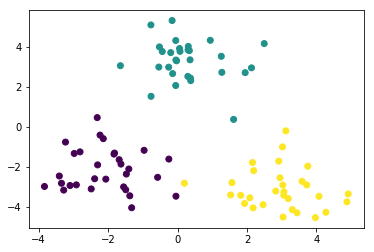

In [3]:
# generate the training data
X, y = make_blobs(centers=[[-2,-2],[0,3],[3,-3]], n_samples = 90, n_features = 2, random_state = 87)

plt.scatter(X[:,0],X[:,1], c = y)
plt.show()

In [4]:
print(y[:10])
print(X[:10,:])

[2 2 2 1 1 1 2 1 2 0]
[[ 4.07304735 -3.48629147]
 [ 3.03118822 -2.92082988]
 [ 1.52891505 -3.41807545]
 [ 1.25922517  3.52807868]
 [-0.76577306  5.09823051]
 [ 2.49586762  4.16487682]
 [ 3.58475307 -2.73520001]
 [ 0.38063619  2.30874697]
 [ 2.17534263 -4.06626534]
 [-1.81293625 -1.31962641]]


In [5]:
# define a fun to add a0 for 1st layer
def add_X0(X):
    x = np.matrix(np.concatenate((np.ones(1),X), axis = 0)) # for 1-D array, axis always = 0
    return x.T

# define a fun to add a0 for hidden layers
def add_a0(X):
    return np.concatenate((np.ones((1,1)),np.matrix(X)), axis = 0)

# define the sigmoid fun
def sig(Z):
    return 1/(1+np.exp(-Z))

# define the derivatrive of sigmoid fun
def d_sig(Z):
    return np.multiply(sig(Z),(1-sig(Z))) # the multiply gives element-element multiplication between matrices

# define the cost fun which only sums over (K = numbers of classes)
def cosJ(X,Y,a3):
    Y_p = np.array(Y)
    h = np.array(a3)
    L = len(X)
    return -1/L*np.sum((Y_p*np.log(h)+(1-Y_p)*np.log(1-h)))

converged at 1936th step
J_ini = 0.2645101; J_fin = 0.2645003


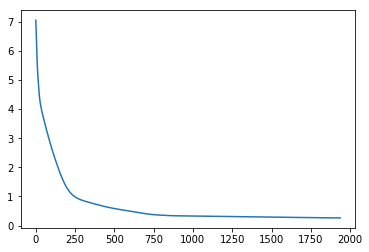

In [6]:
α = 0.05 # the learning rate
n_step = 3000 # the iteration times
Y = np.matrix([])
D = np.matrix(np.zeros((15,1)))
J = list([])
J_ini, J_fin = 0, 0 # cost function before and after change
Y1 = np.matrix([[1],[0],[0]])
Y2 = np.matrix([[0],[1],[0]])
Y3 = np.matrix([[0],[0],[1]])

for j in range(n_step):
    J_fin = 0
    D = np.matrix(np.zeros((15,1)))
    θ1 = θ[:6].reshape(2,3) # the weight matrix in 1st layer
    θ2 = θ[6:].reshape(3,3) # the weight matrix in 2nd layer
    for i in range(len(X)): # start the BP: compute the dJ/dθ and sweap all samples

        a1 = add_X0(X[i,:])[1:] # 2X1 matrix
        a2 = sig(θ1*add_X0(X[i,:])) # 2X1 matrix 
        a3 = sig(θ2*add_a0(a2)) # 3X1 matrix
        # to redefine the output matrix
        if y[i] == 0 :
            Y = Y1
        elif y[i] == 1:
            Y = Y2
        elif y[i] == 2:
            Y = Y3
        δ3 = a3-Y # 3X1 matrix
        θ2_p = θ2[:,1:] # we can't include first column
        δ2 = np.multiply((θ2_p.T)*δ3, d_sig(a2)) # 2X1 matrix
        Δ2 = δ3*(np.transpose(add_a0(a2))) # 3X3 matrix
        D2 = Δ2/len(X)
        Δ1 = δ2*(np.transpose(add_a0(a1))) # 2X3 matrix
        D1 = Δ1/len(X)
        D += np.concatenate((D1.reshape(6,1),D2.reshape(9,1)),axis = 0) # sum over all training samples
        J_fin += cosJ(X,Y,a3)
    #print(J_fin)
    if (abs(J_fin- J_ini) < 1e-05) & (J_fin < J_ini) : # convergence judgement
        print('converged at {}th step'.format(j))
        print('J_ini = {:.7f}; J_fin = {:.7f}'.format(J_ini,J_fin))
        break
    else:
        θ += -α*D # simultaneously update all θij
        J_ini = J_fin
        J += [J_ini]
plt.plot(np.arange(1,len(J)+1), J)

In [7]:
# define the prediction fun
def predict_prob(X,θ):
    X_p = np.concatenate((np.ones((len(X),1)),X),axis = 1)
    θ1 = θ[:6].reshape(2,3) # the weight matrix in 1st layer
    θ2 = θ[6:].reshape(3,3) # the weight matrix in 2nd layer
    a2 = sig(θ1*(X_p.T)) # 2 X N matrix
    #print(np.size(a2,1))
    X_pp = np.concatenate((np.ones((1,np.size(a2,1))),a2),axis = 0)
    a3 = sig(θ2*X_pp) # 3 X N matrix
    return a3

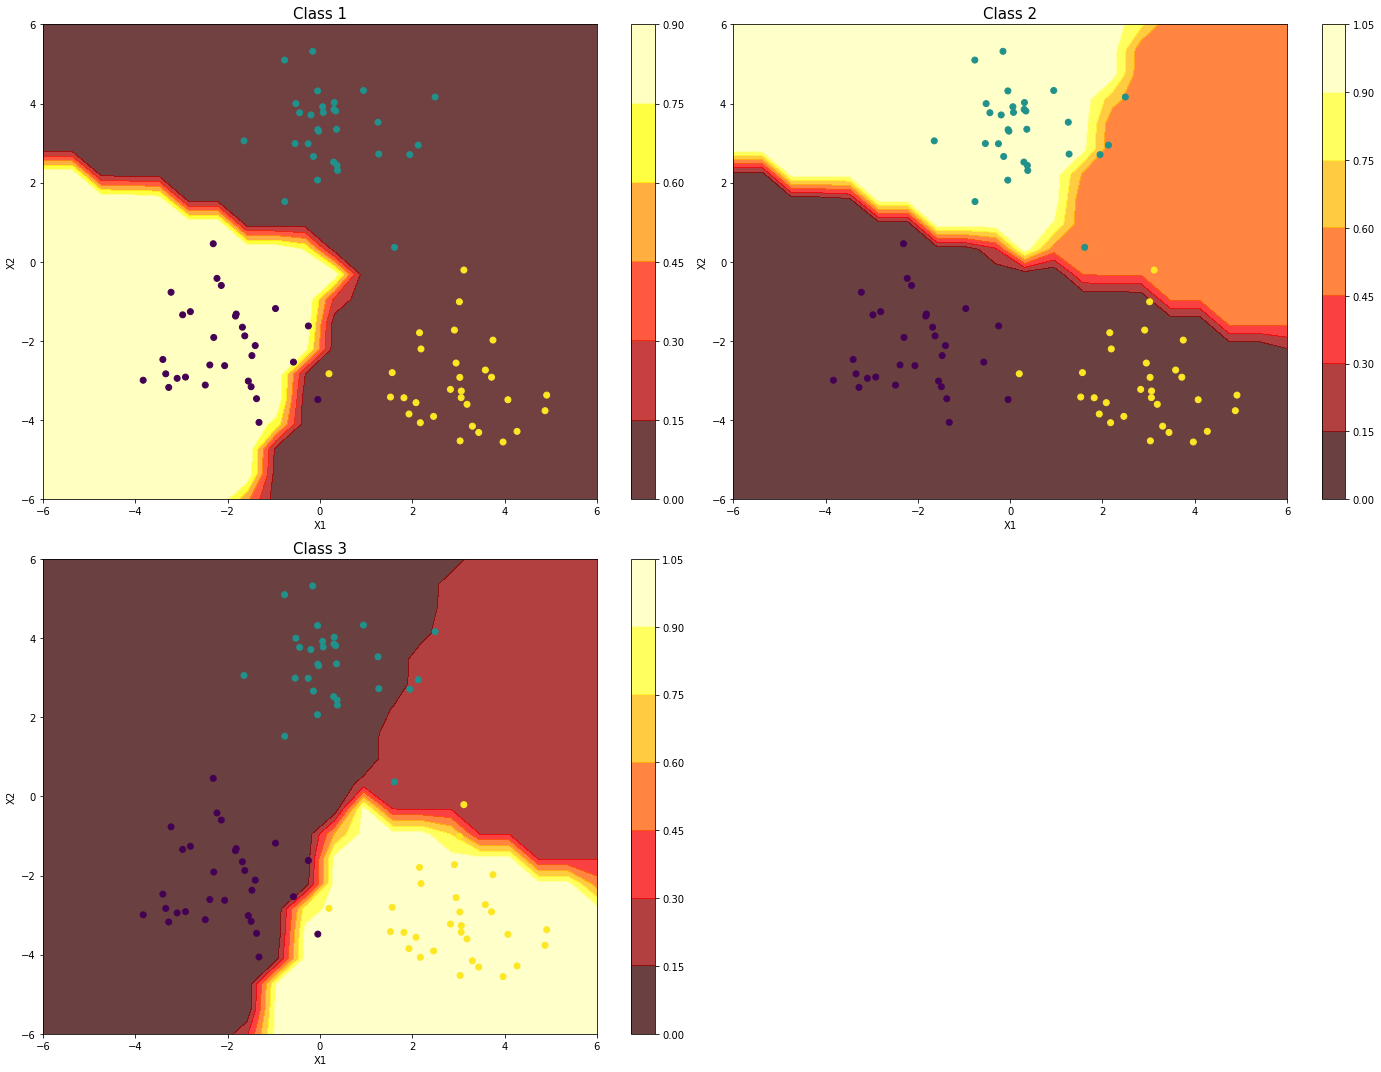

In [8]:
# to measure if the result is reasonalble
x_test, y_test = np.meshgrid(np.linspace(-6,6,20), np.linspace(-6,6,20))
input_test = np.c_[x_test.ravel(),np.ravel(y_test)]
result = predict_prob(input_test,θ)

plt.figure(figsize= (20,15))
for k in range(3):
    plt.subplot(2,2,k+1)
    cmap = result[k,:]
    CF = plt.contourf(x_test, y_test, cmap.reshape(20,20), cmap = plt.cm.hot, alpha = 0.75)
    plt.colorbar(CF)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Class {}'.format(k+1), fontsize = 15)
    plt.tight_layout()
    plt.scatter(X[:,0],X[:,1], c = y)
plt.show()

In [10]:
predict_prob([[0,2]], θ)

matrix([[8.09085389e-02],
        [9.81640204e-01],
        [2.88575633e-04]])

In [11]:
predict_prob([[4,2]], θ)

matrix([[0.00063188],
        [0.47059609],
        [0.2911026 ]])

In [12]:
predict_prob([[2,-3]], θ)

matrix([[0.05961327],
        [0.00114843],
        [0.95290992]])